[윤기태 / 패스트캠퍼스] 최종 수정일 : 2018. 07. 18

## 데이터 분석을 위한 파이썬 프로그래밍 CAMP - 8회차

### *개발 환경 및 사용 라이브러리*
- 개발환경 : OSX 10.13.2, Anaconda-spyder IDE
- 개발언어 : Python 3.6.1
- 사용모듈 : pandas, numpy, matplotlib

---
***

# 2) EDA 에 활용하기

## 2-1) 하우징 데이터 탐색하기

In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 변수간의 관계를 탐색하기

- matplotlib를 이용하여 히트맵을 시각화하는 방법

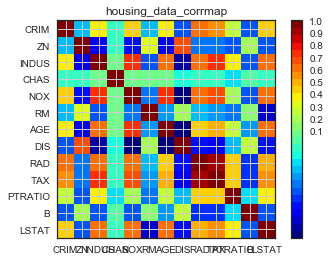

In [23]:
def correlation_matrix(df):
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('housing_data_corrmap')
    fig.colorbar(cax, ticks=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
    groups = df.columns.values
    groups_pos = np.arange(len(groups))
    plt.xticks(groups_pos, groups)
    plt.yticks(groups_pos, groups)
    plt.show()

df_X = df[df.columns[:-1]] # 데이터 프레임에서 y라벨만 제외
correlation_matrix(df_X)

---
- seaborn을 이용하여 변수 다중 scatter plot 작성

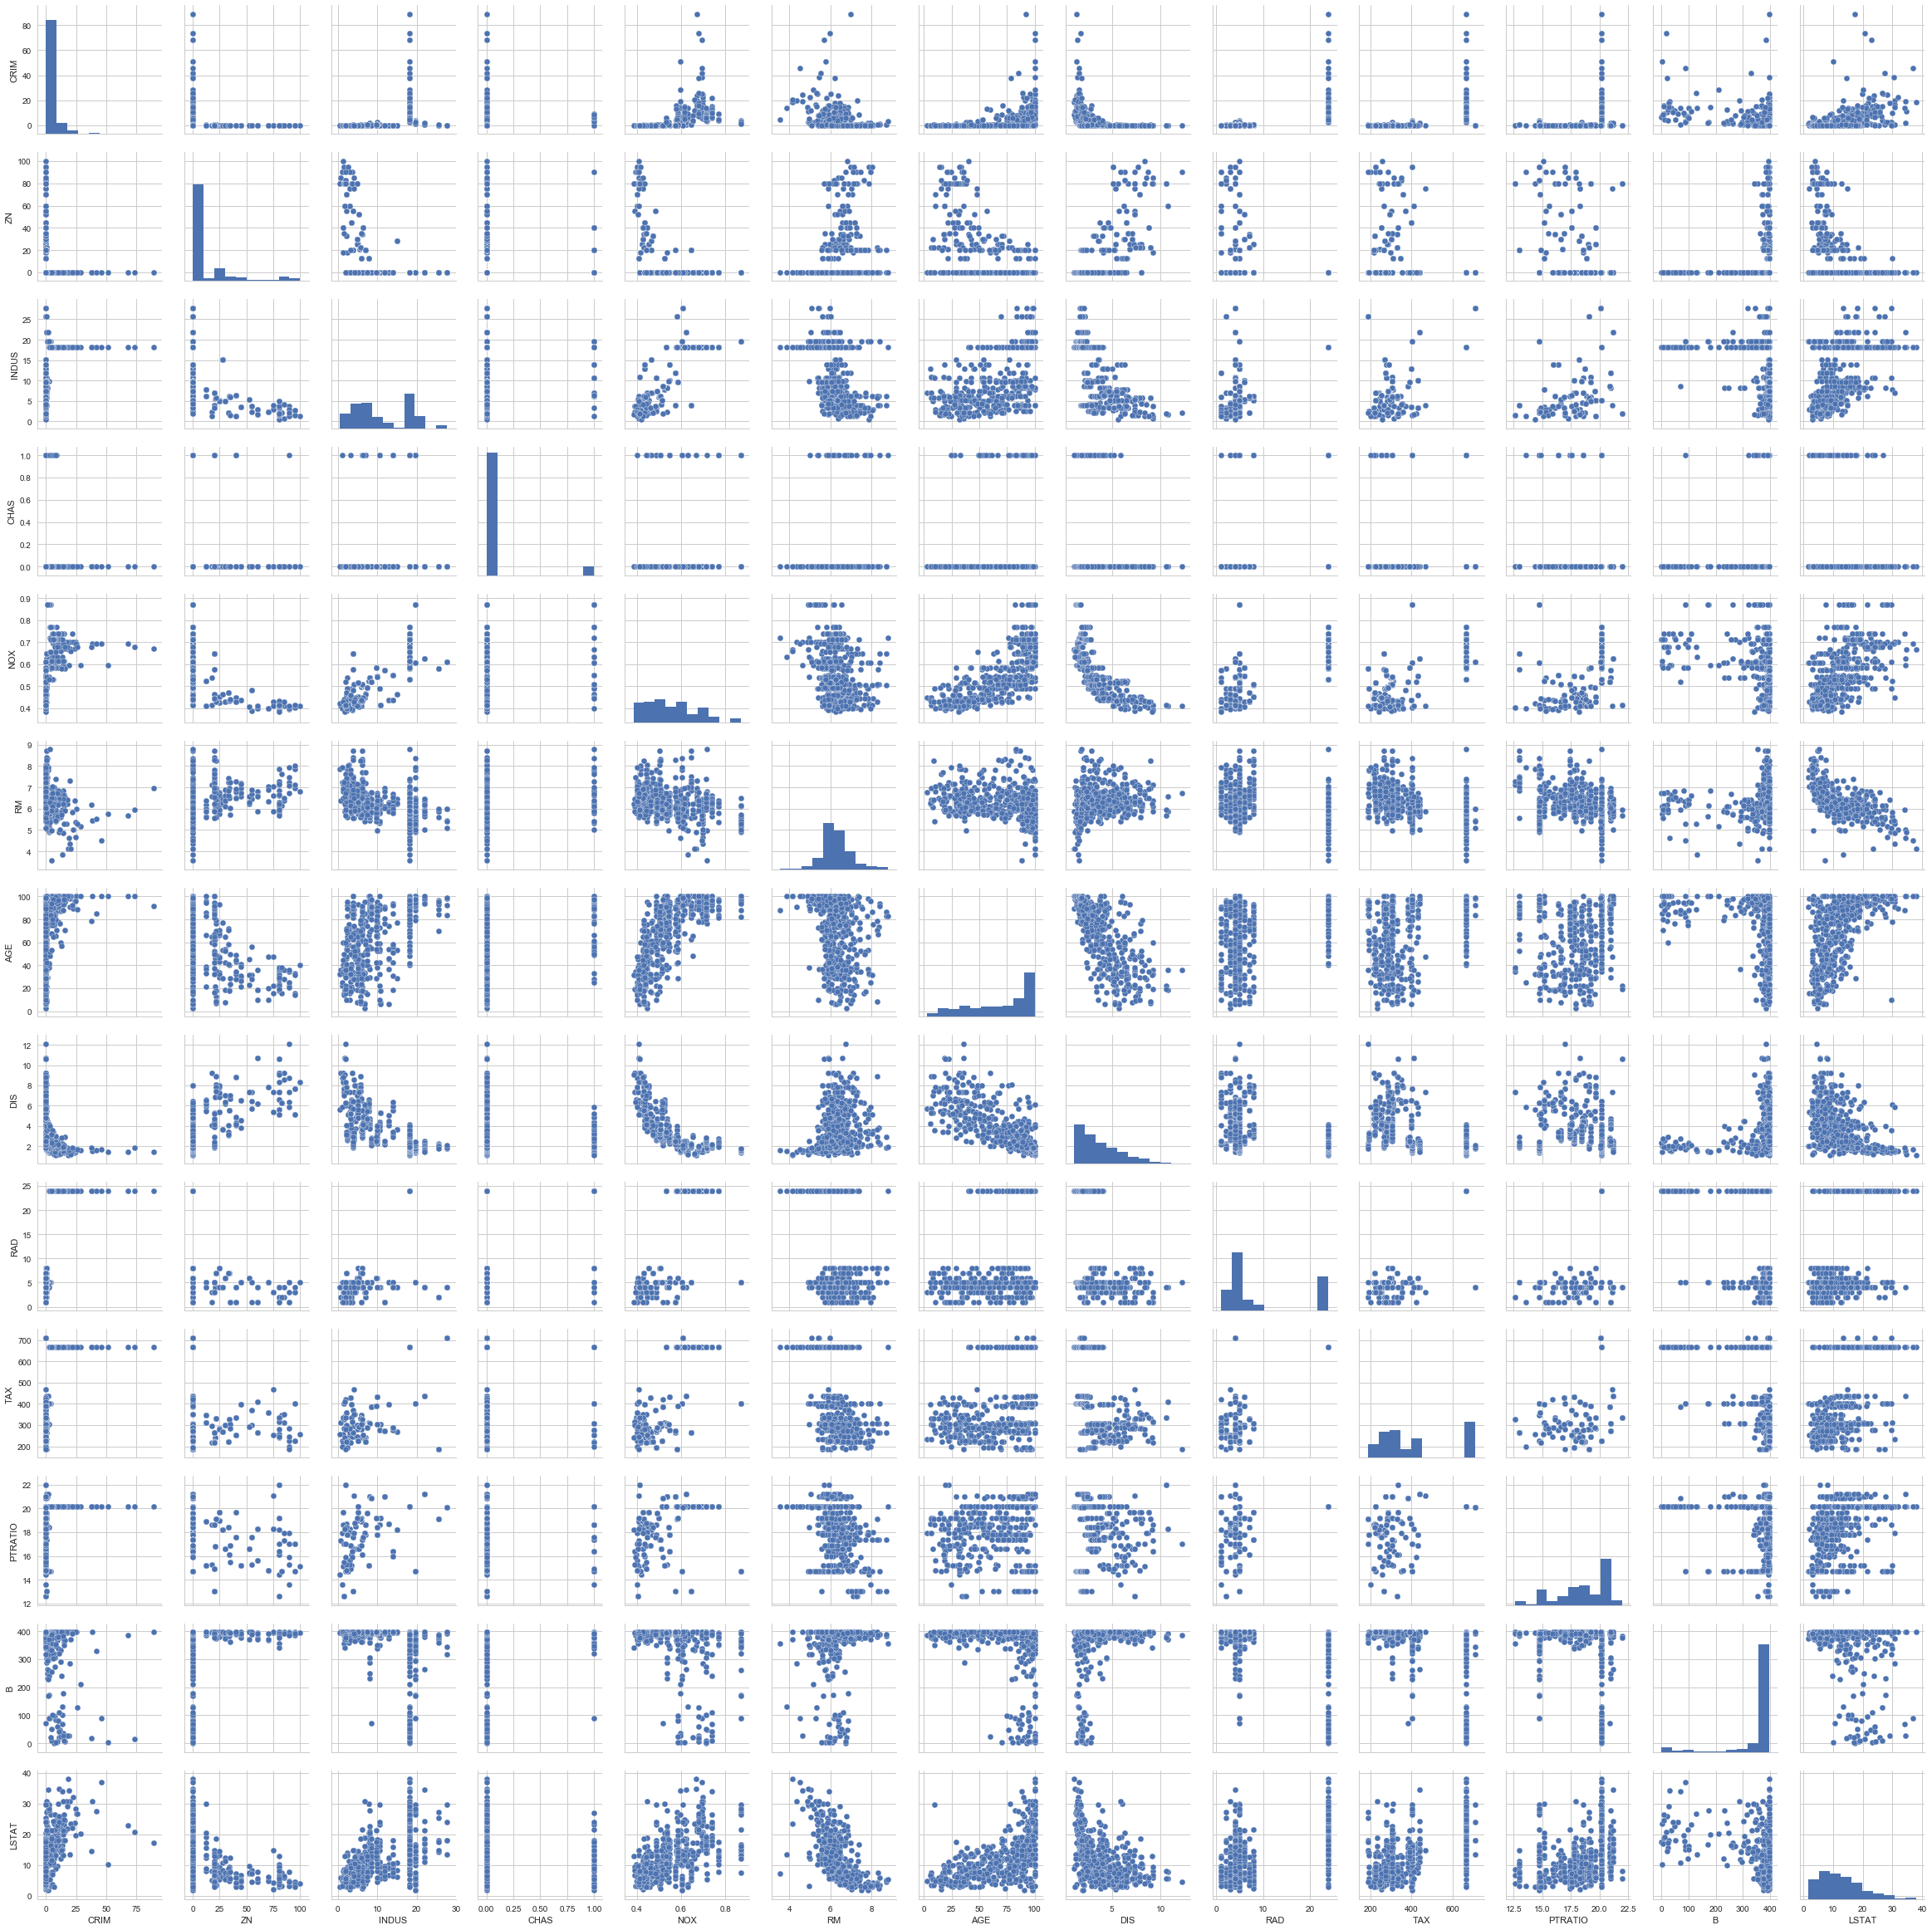

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
sns.pairplot(df[cols], size=2.5)
plt.show()

---

- seaborn을 이용하여 더욱 쉬운 히트맵 시각화도 가능

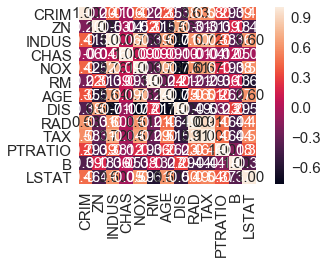

In [25]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

## 2-2) 시계열 데이터 시각화하기

In [26]:
# 연습용 데이터셋 생성 함수
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        data = np.random.randint(low=25,high=1000,size=len(rng))
        states = ['GA','FL','fl','NY','NJ','TX']
        random_states = [states[np.random.randint(low=0,high=len(states))] for i in range(len(rng))]    
        Output.extend(zip(random_states, data, rng))
        
    return Output


# 연습용 데이터셋 생성
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','CustomerCount','StatusDate'])

# Dataframe feature 전처리
df['State'] = df.State.apply(lambda x: x.upper())

# Dataframe index 를 시계열 column으로
df_series = df.set_index('StatusDate')
df_series.sort_index()
df_series.head()

,State,CustomerCount
StatusDate,,
2009-01-05,NY,675
2009-01-12,FL,29
2009-01-19,FL,661
2009-01-26,FL,742
2009-02-02,GA,413


---

- Dataframe.plot을 하게되면, index를 x축으로 하는 line plot 생성. 시계열 관찰에 매우 용이함

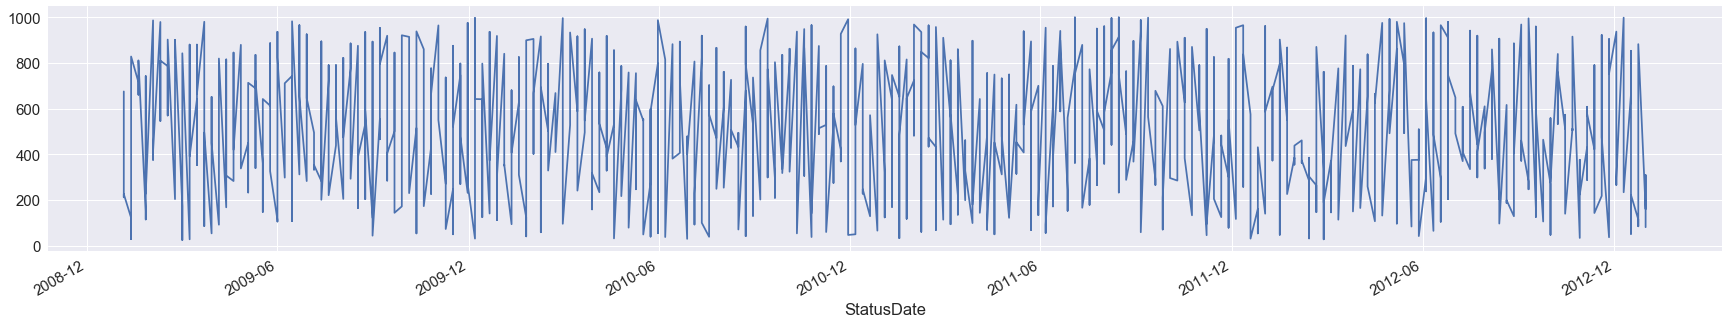

In [27]:
df_series['CustomerCount'].plot(figsize=(30,5))

In [28]:
df_daily = df.reset_index().groupby(['State','StatusDate']).sum() # 도시 + 일자 별 그룹으로 정리
del df_daily['index']
df_daily.head()

CustomerCount
State StatusDate               
FL    2009-01-05            438
      2009-01-12           1058
      2009-01-19           1407
      2009-01-26            894
      2009-02-02            376

- 주어진 데이터를 도시 + 일자 별 그룹으로 정리

---

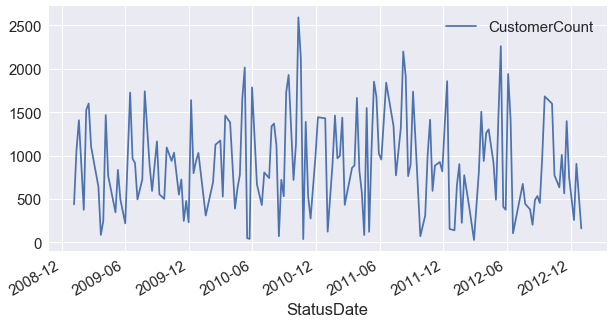

In [29]:
df_daily.loc['FL'].plot(figsize=(10,5))

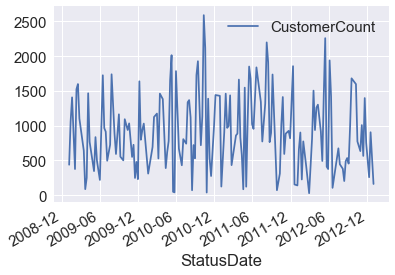

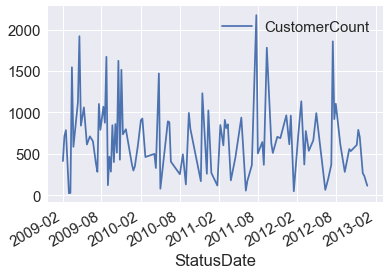

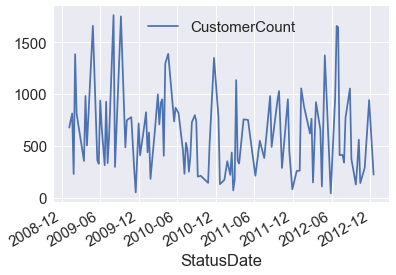

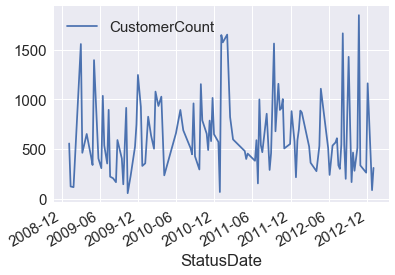

In [30]:
df_daily.loc['FL'].plot()
df_daily.loc['GA'].plot()
df_daily.loc['NY'].plot()
df_daily.loc['TX'].plot()

---

- 4개 그래프의 날짜 비교축이 안맞는 문제는 그래프로 해결 불가능. 같은 축에 놓고 해결하고 싶은 경우는 다음과 같음.

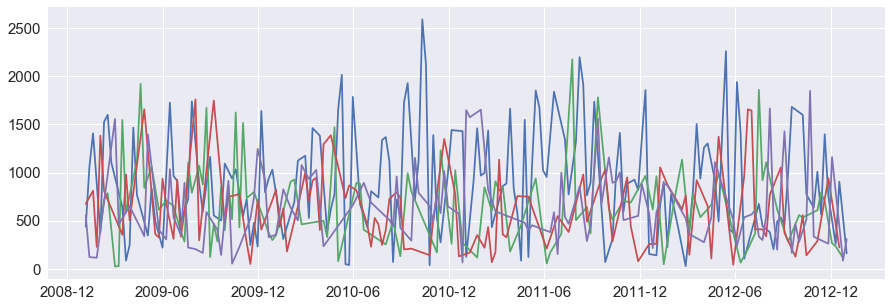

In [31]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(df_daily.loc['FL'], label="FL")
plt.plot(df_daily.loc['GA'], label="GA")
plt.plot(df_daily.loc['NY'], label="NY")
plt.plot(df_daily.loc['TX'], label="TX")

## 2-3) 이미지 타입의 시각화 자료 임베딩하기

In [32]:
import requests
from bs4 import BeautifulSoup
import re
import ast


# 뉴스기사 리스트 크롤링
base_url = 'http://news.naver.com/main/list.nhn?mode=LS2D&mid=shm&sid1=100&sid2=269'
req = requests.get(base_url)
html = req.content
soup = BeautifulSoup(html, 'lxml') # pip install lxml
newslist = soup.find(name="div", attrs={"class":"newsflash_body"})
newslist_atag = newslist.find_all('a')
url_list = []
for a in newslist_atag:
    url_list.append(a.get('href'))
    

# 텍스트 정제 함수, 알파벳과 특수문자 제거
def text_cleaning(text):
    result_list = []
    for item in text:
        cleaned_text = re.sub('[a-zA-Z]', '', item)
        cleaned_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]',
                          '', cleaned_text)
        result_list.append(cleaned_text)
    return result_list

# 텍스트 정제 함수, isalnum: 알파벳과 숫자 True, isdigit: 10진수 True
def removeNumberNpunct(doc):
    text = ''.join(c for c in doc if c.isalnum() or c in '+, ')
    text = ''.join([i for i in text if not i.isdigit()])
    return text

# 각 기사에서 텍스트만 정제하여 추출
req = requests.get(url_list[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
text = ''
doc = None
for item in soup.find_all('div', id='articleBodyContents'):
    text = text + str(item.find_all(text=True))
    text = ast.literal_eval(text)
    doc = text_cleaning(text[9:])
    doc = text[9:-9]
    
word_corpus = (' '.join(doc))
word_corpus = removeNumberNpunct(word_corpus)


# 텍스트에서 형태소 추출 -> pip install konlpy, jpype1, Jpype1-py3
from konlpy.tag import Twitter
from collections import Counter

nouns_tagger = Twitter()
nouns = nouns_tagger.nouns(word_corpus)
count = Counter(nouns)


# 형태소 워드 클라우드로 시각화 -> pip install pytagcloud, webbrowser
# Mac OS : /anaconda/envs/fastcampus/lib/python3.6/site-packages/pytagcloud/fonts
# Windosw OS : C:\Users\USER\Anaconda3\envs\pc36 (가상환경주소) \Lib\site-packages\pytagcloud\fonts
# 위 경로에 NanumBarunGothic.ttf 파일 옮기기
import random
import pytagcloud
import webbrowser

ranked_tags = count.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'img/wordcloud.jpg', size=(900, 600), fontname='Nobile', rectangular=False)

---

- 주피터 노트북에서 워드 클라우드 등으로 생성한 이미지 데이터를 불러오는 법

In [33]:
%%html
<img src="img/wordcloud.jpg",width=60,height=60>

# 3) 결과를 평가하는 자료로 활용

## 3-1) 의사결정나무를 이용한 분류 알고리즘 시각화

- 데이터 불러오기 및 데이터 분할

In [34]:
from sklearn.model_selection import train_test_split

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby('class').size())

X = dataset.iloc[:, :-1].values
y = dataset['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

---

- 모델 학습하기

In [35]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.97777777777777775

---

- graphviz를 이용하여 의사결정나무 시각화하기

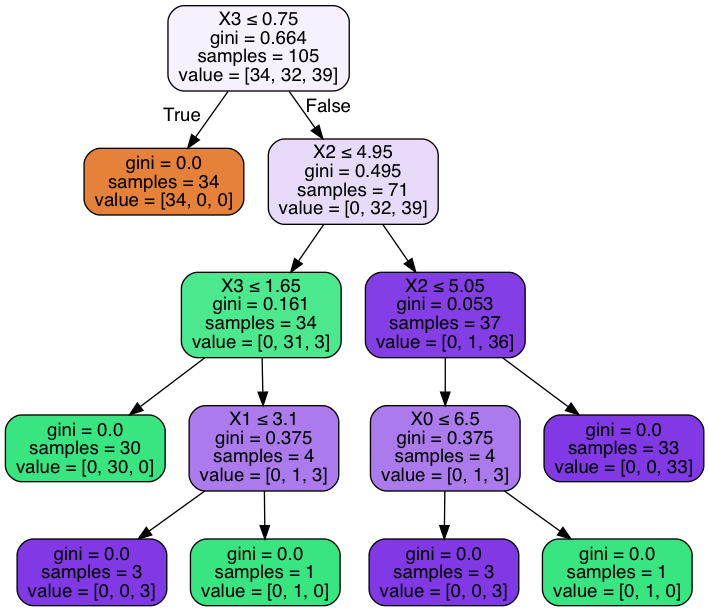

In [36]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 3-2) 컨퓨전 매트릭스의 시각화

- 가장 기본적인 컨퓨전 매트릭스 평가 방법

In [37]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


---

- 컨퓨전 매트릭스 시각화

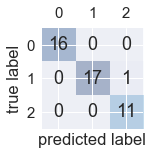

In [38]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
plt.show()

---
- scikit-plot 모듈을 이용한 간단한 시각화

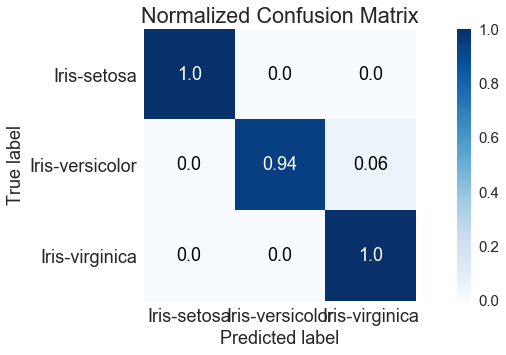

In [39]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

---

## 3-3) 여러 분류 알고리즘의 성능 시각화

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

clf1 = GaussianNB() # 나이브 베이즈 분류기
clf1 = clf1.fit(X_train, y_train)

clf2 = DecisionTreeClassifier() # 의사결정나무
clf2 = clf2.fit(X_train, y_train)

clf3 = KNeighborsClassifier(n_neighbors=1, # KNN 분류기
                            p=2, 
                            metric='minkowski')
clf3 = clf3.fit(X_train, y_train)

print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))
print(clf3.score(X_test, y_test))

1.0
0.977777777778
0.977777777778


---
***

> ROC Curve

ROC Curve란 : ROC 그래프는 분류기의 결정 임계치를 이동함으로써 계산되는 가양성 비율과 진양성 비율에 대한 분류 성능을 기반으로 하여 모델을 선택하기에 유용한 도구. ROC 그래프의 대각선은 랜덤 추측으로 이해될 수 있고, 대각선의 왼쪽 위로 치우칠수록 랜덤 추측이 배제된 좋은 모델로 볼 수 있음. ROC의 평가 기준이 되는 계수는 AUC(Area Under the Curve).

In [41]:
%%html
<img src="img/roc_curve.png">

민감도(sensitivity)

- 1인 케이스에 대해 1이라고 예측한 것 



특이도(specificity)

- 0인 케이스에 대해 0이라고 예측한 것 



양성율(True Positive Rate; TPR)

- TPR = 민감도 = 1 - 위음성율, true accept rate 

- 1인 케이스에 대해 1로 맞게 예측한 비율 

- ex) 암환자를 진찰해서 암이라고 진단 함 



위양성율(False Positive Rate; FPR) 

- FPR = 1 - 특이도, false accept rate 

- 0인 케이스에 대해 1로 잘못 예측한 비율 

- ex) 암환자가 아닌데 암이라고 진단 함


**--> ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 Fall-out과 Recall의 변화를 시각화한 것이다.**

---
***

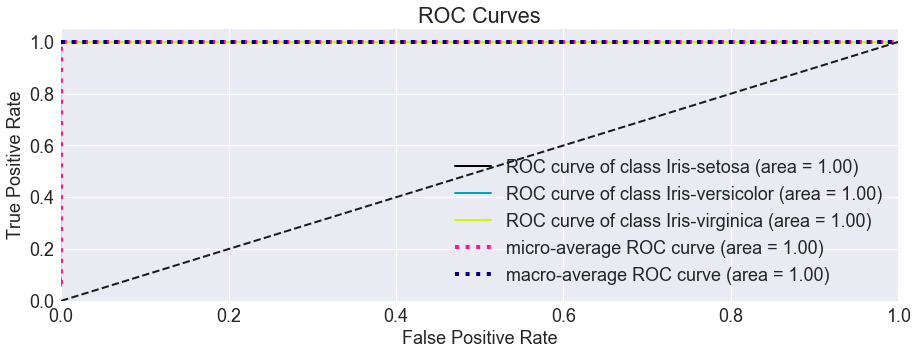

In [42]:
# 나이브 베이즈 분류기 ROC Curve

y_pred = clf1.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

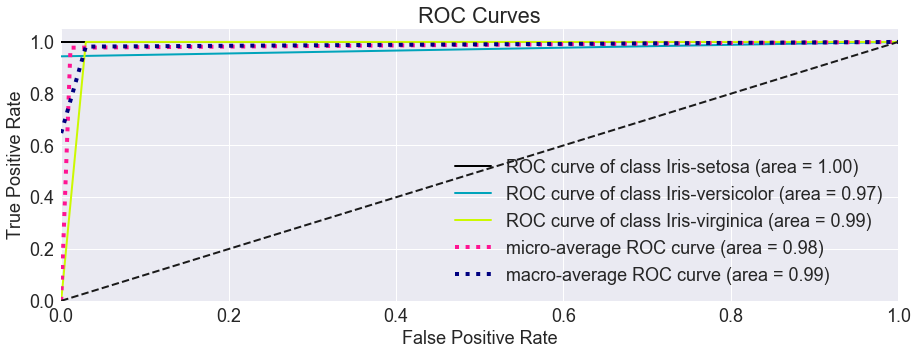

In [43]:
# 의사결정나무 ROC Curve

y_pred = clf2.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

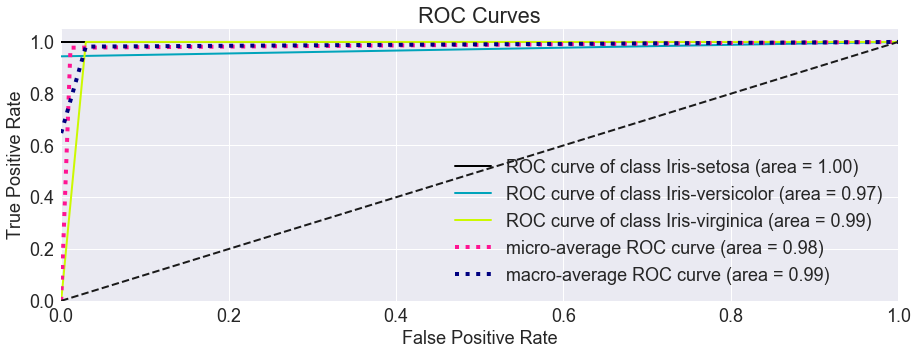

In [44]:
# KNN분류기 ROC Curve

y_pred = clf3.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

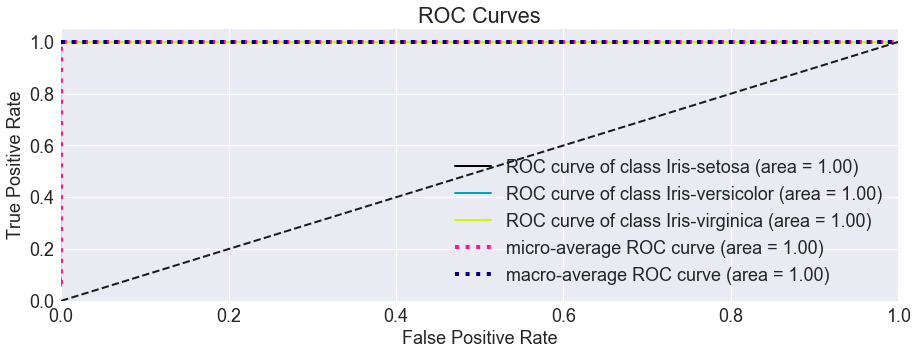

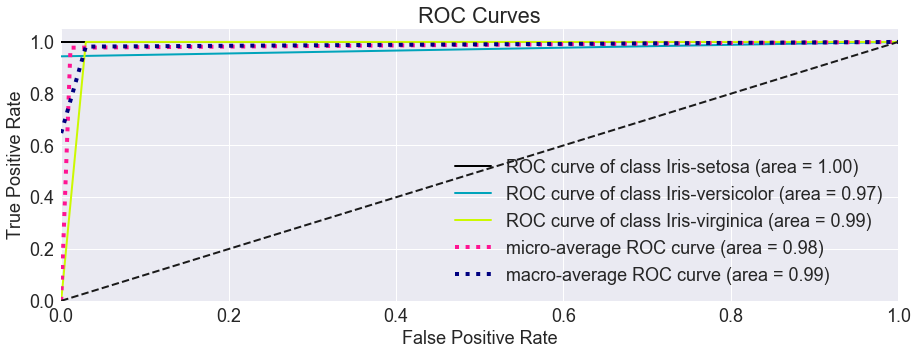

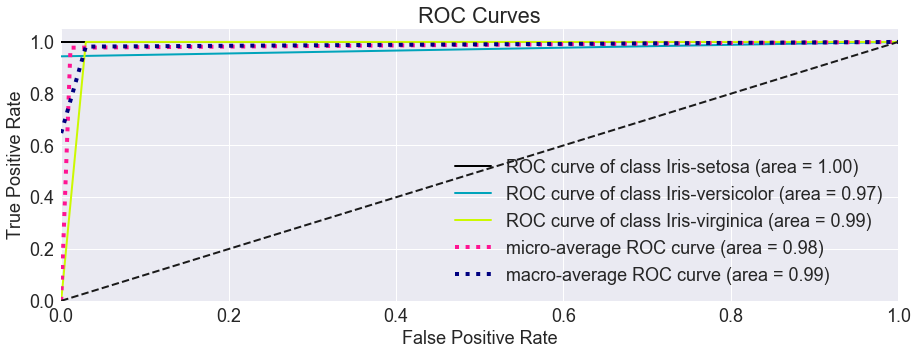

In [45]:
# 연속된 그래프로 관찰하기

y_pred = clf1.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)

y_pred = clf2.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)

y_pred = clf3.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

## 3-4) 검증곡선을 활용한 파라미터 튜닝 시각화

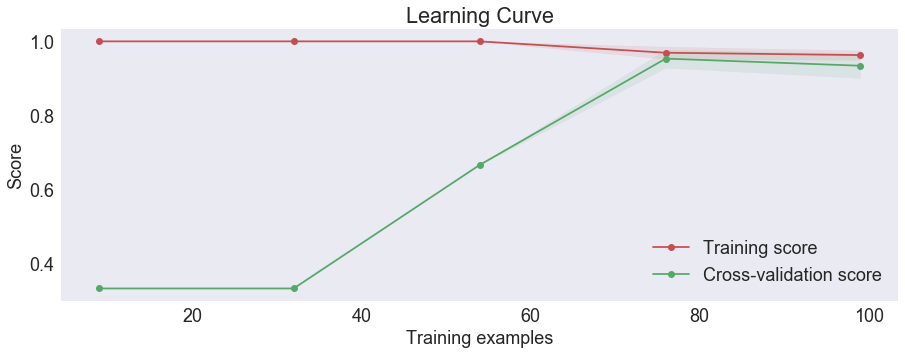

In [46]:
skplt.estimators.plot_learning_curve(clf1, X, y)
plt.show()

- 데이터 전체를 이용하여 cross-validation을 평가했을 때, training sample이 80개가 넘어가는 지점부터 모델의 overfitting이 없어짐

-----

-----

## 4) 데이터의 통계적 분포 탐색

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', color_codes=True)

iris = pd.read_csv('iris.csv')

In [48]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### iris 데이터의 분포 탐색하기

In [49]:
iris['variety'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

- scatter plot

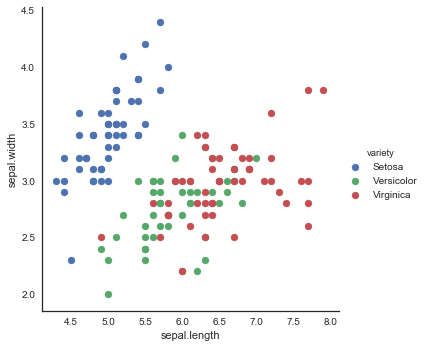

In [50]:
sns.FacetGrid(iris, hue='variety',size=5)\
.map(plt.scatter, 'sepal.length','sepal.width')\
.add_legend()

### 통계적 분포 그래프의 활용 : box plot

- 이상치 검출의 기준으로 활용 가능
- 이상치를 (판단/제거) 하는 python library가 존재
- 그러나 대부분의 비즈니스나 연구 상황에서 이상치 판단 기준은 상이하므로, 일반적으로 활용할 여지는 거의 없음.
- numpy 등의 수치연산을 수행한 뒤 저마다의 판단 기준으로 z값, 카이제곱 검정 등으로 이상치를 걸러내는 것이 바람직함.

참고 : 카이제곱의 개념(http://yamalab.tistory.com/69?category=747907)

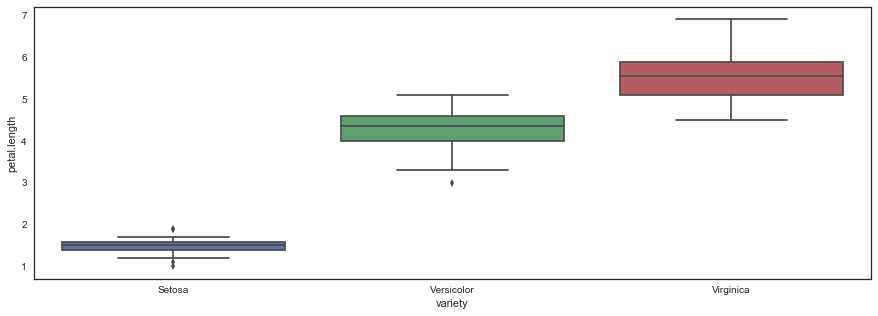

In [51]:
sns.boxplot(x='variety',y='petal.length',data=iris)

- scatter point 추가

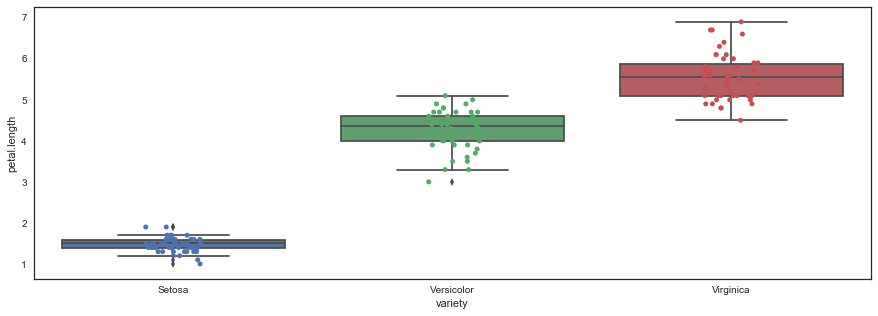

In [52]:
ax = sns.boxplot(x='variety',y='petal.length',data=iris)
ax = sns.stripplot(x='variety',y='petal.length',data=iris,\
                 jitter=True, edgecolor='gray')

- 두 plot을 결합한 violin plot

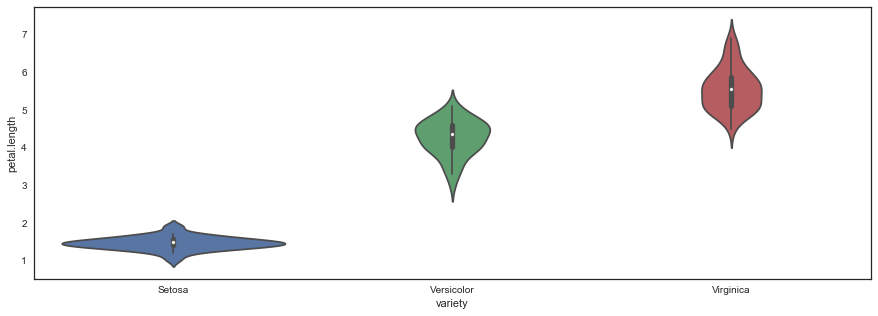

In [53]:
sns.violinplot(x='variety',y='petal.length',data=iris,size=5)

- kde plot : Kernel Density Estimation
- 커널 밀도 추정 : 어떤 변수가 가질 수 있는 값, 또는 그 값을 가질 가능성의 정도를 numerical하게 추정하는 방법, 일종의 확률밀도함수.

자세한 내용 참고(http://darkpgmr.tistory.com/147)

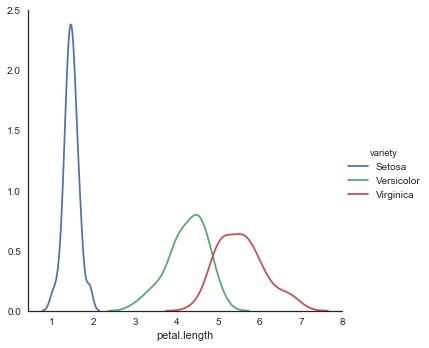

In [54]:
sns.FacetGrid(iris, hue='variety',size=5)\
.map(sns.kdeplot,'petal.length')\
.add_legend()

- 데이터 분포를 살펴볼 때에도 변수 간 관계는 중요.

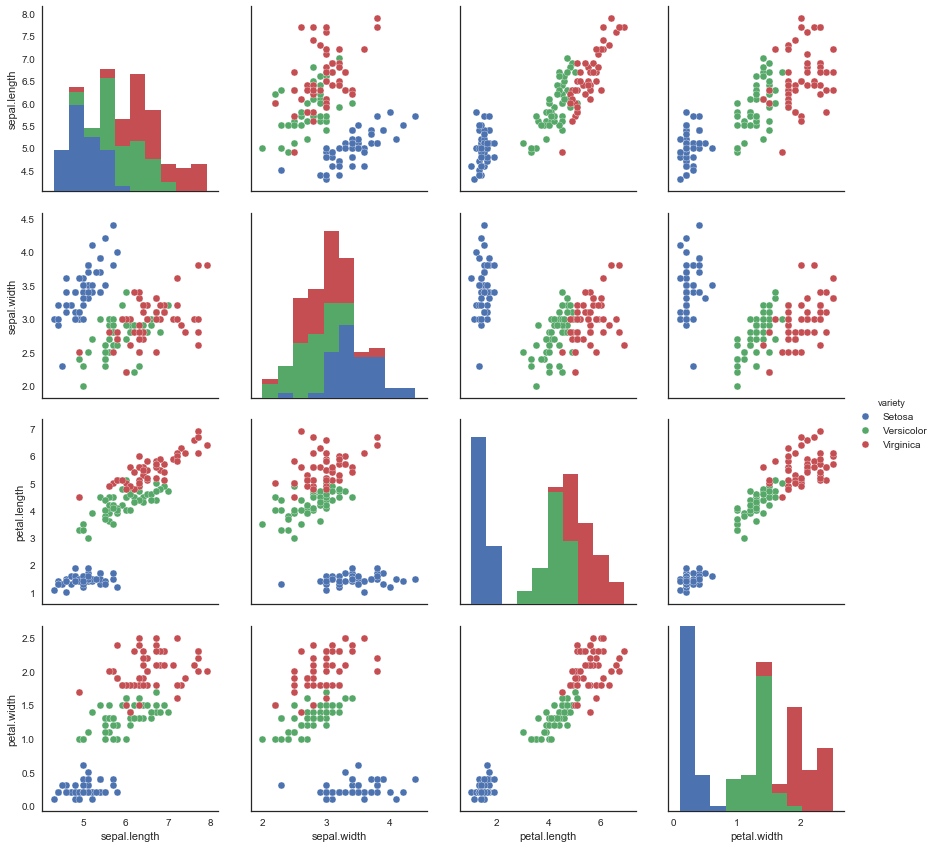

In [55]:
sns.pairplot(iris, hue='variety',size=3)

- pandas로 간편하게 그리는 boxplot : 활용도 높음

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1322b94a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1324f9c88>]], dtype=object)

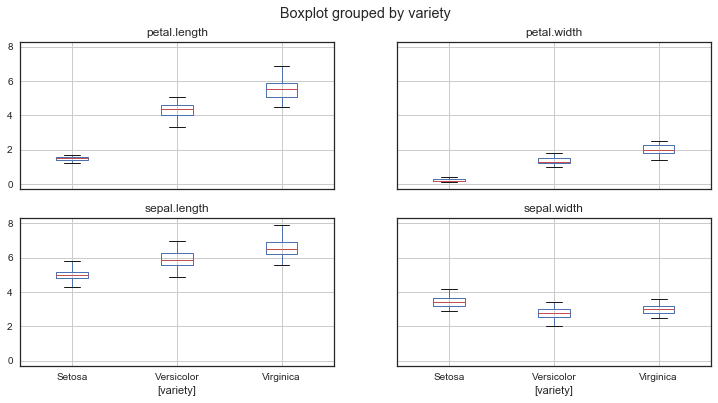

In [56]:
# iris -> DataFrame
iris.boxplot(by='variety', figsize=(12,6))

- 다차원 피처로 구성된 데이터의 분산 시각화

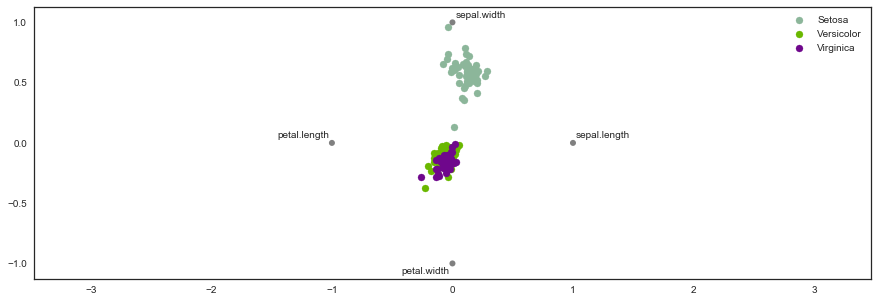

In [57]:
from pandas.plotting import radviz
radviz(iris, 'variety')